# Bigger Picture - Home Assignment

## Data Collection

In [2]:
import pandas as pd
history_data = pd.read_parquet('ebnerd_small/train/history.parquet', engine='pyarrow')

data = history_data.explode(['impression_time_fixed','scroll_percentage_fixed', 'article_id_fixed', 'read_time_fixed'])
print(data.head())

   user_id impression_time_fixed scroll_percentage_fixed article_id_fixed  \
0    13538   2023-04-27 10:17:43                   100.0          9738663   
0    13538   2023-04-27 10:18:01                    35.0          9738569   
0    13538   2023-04-27 10:18:13                   100.0          9738663   
0    13538   2023-04-27 10:18:17                    24.0          9738490   
0    13538   2023-04-27 10:18:23                   100.0          9738663   

  read_time_fixed  
0            17.0  
0            12.0  
0             4.0  
0             5.0  
0             4.0  


## Data Analysis

In [3]:
print('Number of rows and columns:',data.shape)

Number of rows and columns: (2426247, 5)


In [4]:
print("Number of users:", len(data.index.unique()))

Number of users: 15143


In [6]:
print('Number of articles read by different users:')
x_d = pd.pivot_table(data, values='article_id_fixed', index='user_id', aggfunc='count')
x_d = x_d.sort_values(by='article_id_fixed', ascending=False)
print(x_d)

Number of articles read by different users:
         article_id_fixed
user_id                  
1214299              1896
2287060              1359
480975               1246
352411               1222
1406895              1188
...                   ...
764140                  5
2125540                 5
1611297                 5
1864737                 5
1498451                 5

[15143 rows x 1 columns]


In [7]:
# Assuming 'data' is your DataFrame

print('Number of articles read on different hours of the day:')

# Extract the hour from the 'impression_time_fixed' column (assuming it's datetime format)
data['hour'] = pd.to_datetime(data['impression_time_fixed']).dt.hour

# Count the number of articles read on each hour
hod_counts = data['hour'].value_counts()

# Print the results
print(hod_counts)

Number of articles read on different hours of the day:
hour
6     161301
5     148382
7     142318
19    132166
4     131083
14    128694
18    127509
15    127250
10    126906
17    123275
20    123075
11    119981
13    118329
8     118297
16    116827
12    114287
9     113980
21     83245
3      64510
22     37397
2      23237
23     18454
1      13095
0      12649
Name: count, dtype: int64


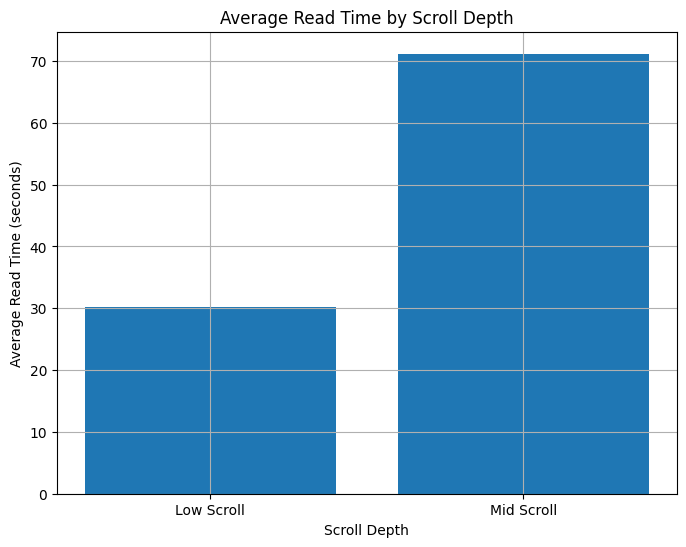

Number of articles read on different days of the week:


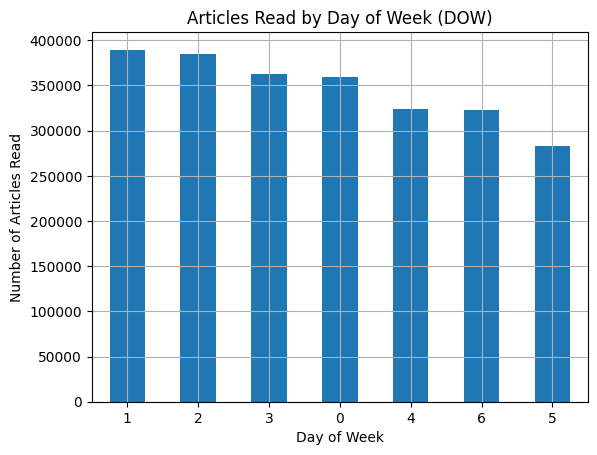

Number of articles read on different hours of the day:


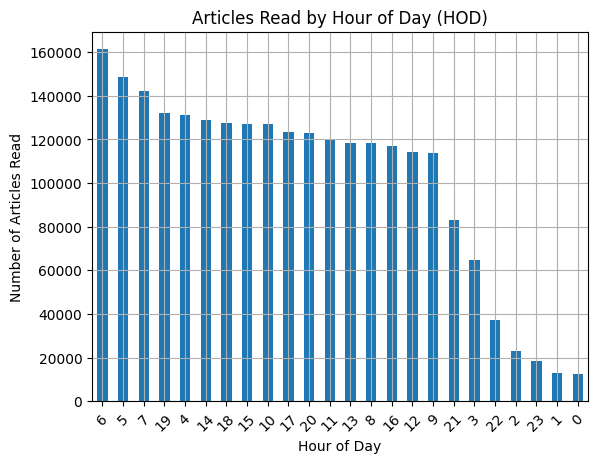

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data['dow'] = pd.to_datetime(data['impression_time_fixed']).dt.dayofweek.astype('str')
data['hod'] = pd.to_datetime(data['impression_time_fixed']).dt.hour.astype('str')

scroll_percentiles = data['scroll_percentage_fixed'].describe(percentiles=[.25, .5, .75])

low_pct = 0.25
high_pct = 0.75
low_scroll = data[data['scroll_percentage_fixed'] <= data['scroll_percentage_fixed'].quantile(low_pct)]
mid_scroll = data[(data['scroll_percentage_fixed'] > data['scroll_percentage_fixed'].quantile(low_pct)) & (data['scroll_percentage_fixed'] <= data['scroll_percentage_fixed'].quantile(high_pct))]
high_scroll = data[data['scroll_percentage_fixed'] > data['scroll_percentage_fixed'].quantile(high_pct)]

# Average Read Time by Scroll Depth
low_scroll_avg_read_time = low_scroll['read_time_fixed'].mean()
mid_scroll_avg_read_time = mid_scroll['read_time_fixed'].mean()
high_scroll_avg_read_time = high_scroll['read_time_fixed'].mean()

# Visualization (example bar chart)
plt.figure(figsize=(8, 6))
plt.bar(['Low Scroll', 'Mid Scroll', 'High Scroll'], [low_scroll_avg_read_time, mid_scroll_avg_read_time, high_scroll_avg_read_time])
plt.xlabel('Scroll Depth')
plt.ylabel('Average Read Time (seconds)')
plt.title('Average Read Time by Scroll Depth')
plt.grid(True)
plt.show()

print('Number of articles read on different days of the week:')
data['dow'].value_counts().plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles Read')
plt.title('Articles Read by Day of Week (DOW)')
plt.xticks(rotation=0) 
plt.grid(True)
plt.show()

print('Number of articles read on different hours of the day:')
data['hod'].value_counts().plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles Read')
plt.title('Articles Read by Hour of Day (HOD)')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()


In [12]:
# Assuming data is your DataFrame
data['dow'] = data['dow'].astype('str')
data['hod'] = data['hod'].astype('str')
data['H_D'] = data['dow'] + '-' + data.hod
data.head()

,user_id,impression_time_fixed,scroll_percentage_fixed,article_id_fixed,read_time_fixed,hour,dow,hod,H_D
0,13538,2023-04-27 10:17:43,100.0,9738663,17.0,10,3,10,3-10
0,13538,2023-04-27 10:18:01,35.0,9738569,12.0,10,3,10,3-10
0,13538,2023-04-27 10:18:13,100.0,9738663,4.0,10,3,10,3-10
0,13538,2023-04-27 10:18:17,24.0,9738490,5.0,10,3,10,3-10
0,13538,2023-04-27 10:18:23,100.0,9738663,4.0,10,3,10,3-10


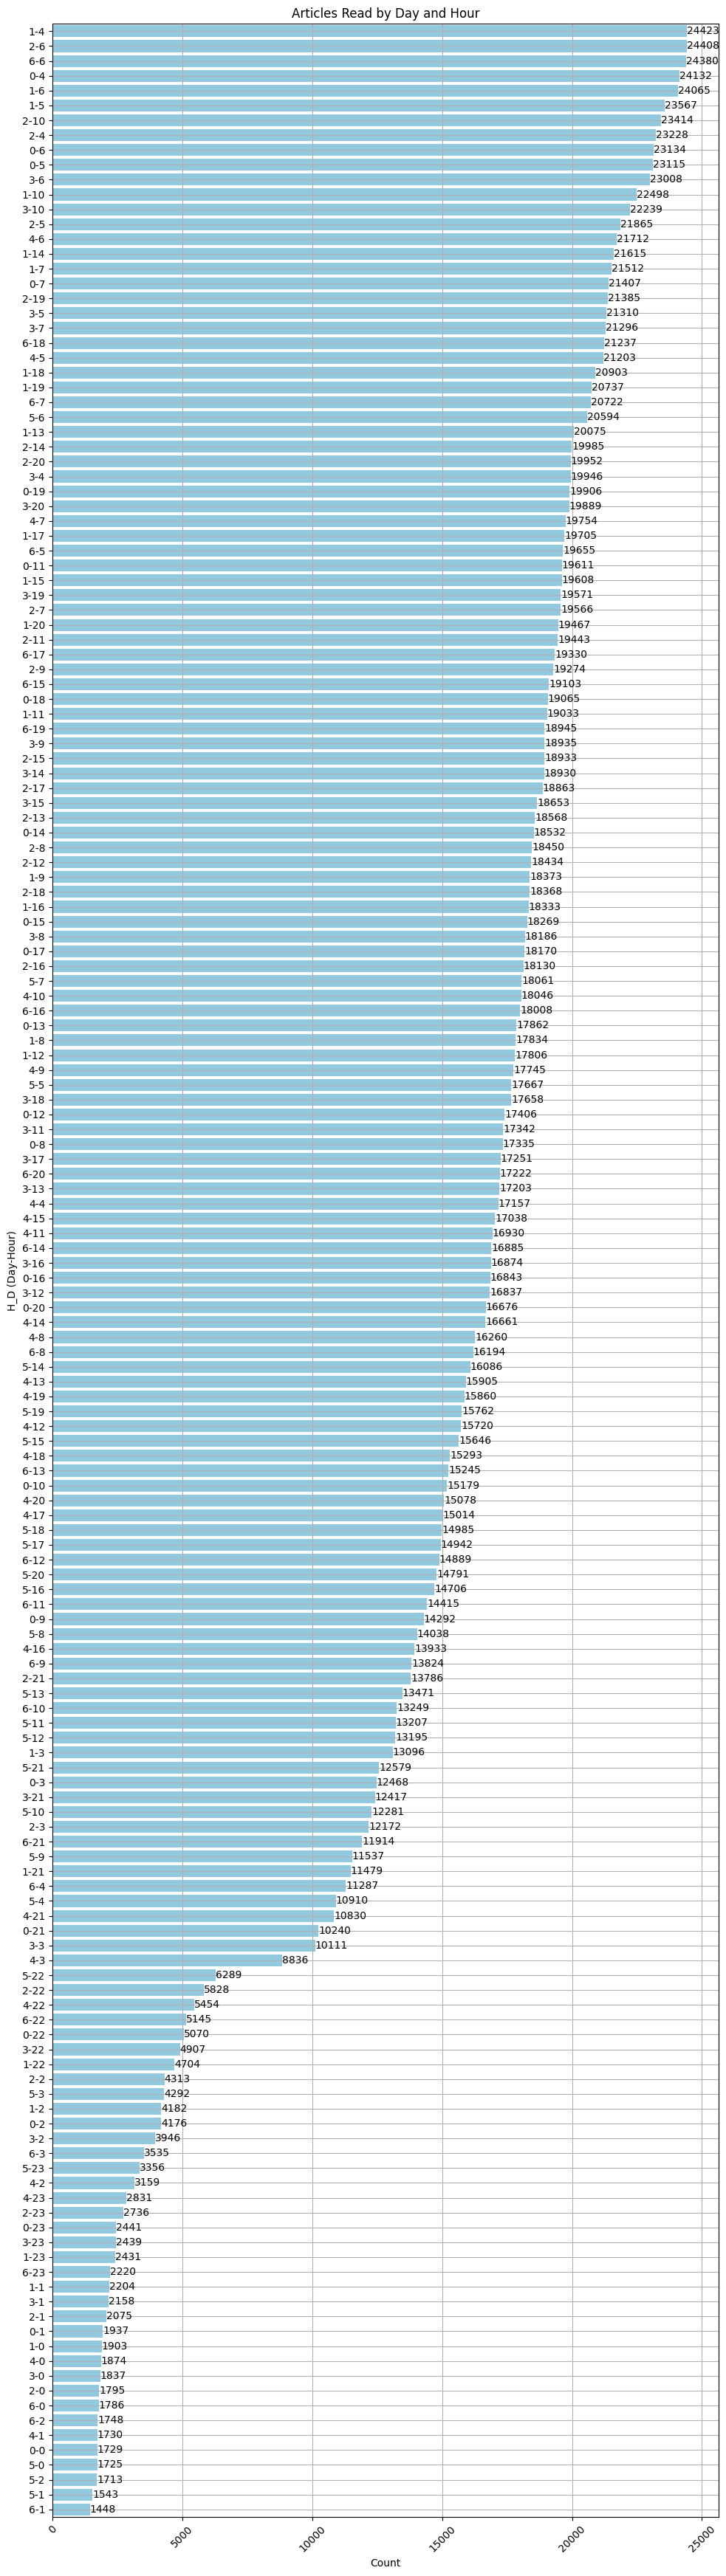

In [16]:
order_H = data['H_D'].value_counts().index

n_H = data['H_D'].shape[0]
percentages = (data['H_D'].value_counts() / n_H) * 100 
fig, ax = plt.subplots(figsize=(10, 35)) 
sns.countplot(data=data, y='H_D', order=order_H, color='skyblue')

ax.bar_label(ax.containers[0])

plt.xlabel('Count')
plt.ylabel('H_D (Day-Hour)') 
plt.title('Articles Read by Day and Hour')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [17]:
# train_ratings = train_data
data['user'] = data['user_id']
data['item'] = data['article_id_fixed']
data['rating'] = data['read_time_fixed']
data = data[['user', 'item', 'rating']]
data = data.reset_index()
del data['index']
data = data.drop_duplicates(subset=['user', 'item'])

data = data.pivot(index='item', columns='user', values='rating')
data = data.infer_objects(copy=False)  # Analyze and set data types
data = data.fillna(0)

In [20]:
print(data.head())

user     10068    10200    10201    10623    10701    10971    11132    \
item                                                                     
3001353      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3012771      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3034849      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3037494      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3039288      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

user     11551    11609    11649    ...  2589002  2589251  2589339  2589430  \
item                                ...                                       
3001353      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
3012771      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
3034849      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
3037494      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
3039288

### Training a Model

what is the grouping' how do you split it?

In [23]:
from sklearn.model_selection import GroupShuffleSplit 

groups = data.index

splitter = GroupShuffleSplit(test_size=0.2, n_splits=2, random_state=7)
split = splitter.split(data, groups=groups)
train_inds, test_inds = next(split)

train = data.iloc[train_inds]
test = data.iloc[test_inds]
print(train.head(5))
print(len(train), len(test))


user     10068    10200    10201    10623    10701    10971    11132    \
item                                                                     
3001353      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3012771      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3034849      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3037494      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3039288      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

user     11551    11609    11649    ...  2589002  2589251  2589339  2589430  \
item                                ...                                       
3001353      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
3012771      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
3034849      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
3037494      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
3039288

In [32]:
from implicit.nearest_neighbours import bm25_weight


article_user_visits = bm25_weight(data, B=0.9) * 5

#this gives more weight to users visits than the connection of the actual document

# get the transpose since the most of the functions in implicit expect (user, item) sparse matrices instead of (item, user)
user_plays = article_user_visits.T.tocsr()

#this creates the matrix and transposes it then storing it efficiently in th mem

Once we have a weighted confidence matrix, we can use that to train an ALS model using implicit:

In [33]:
from implicit.als import AlternatingLeastSquares

model = AlternatingLeastSquares(factors = 500, iterations = 10)
model.fit(user_plays)

100%|███████████████████████████████████████████| 10/10 [01:22<00:00,  8.22s/it]


In [34]:
# Get recommendations for the a single user
userid = 10068
ids, scores = model.recommend(userid, user_plays[userid], N=10, filter_already_liked_items=False)

In [35]:
# Use pandas to display the output in a table, pandas isn't a dependency of implicit otherwise
import numpy as np
import pandas as pd
pd.DataFrame({"article": ids, "score": scores, "already_liked": np.in1d(ids, user_plays[userid].indices)})

,article,score,already_liked
0,7940,0.990385,True
1,7955,0.977235,True
2,7631,0.970066,True
3,7880,0.960393,True
4,7622,0.868369,True
5,8765,0.821387,True
6,7958,0.512907,False
7,7729,0.453309,False
8,7930,0.420761,False
9,7939,0.405744,False


In [36]:
import numpy as np
from scipy.sparse import csr_matrix
from implicit.evaluation import precision_at_k, ranking_metrics_at_k, ndcg_at_k

def precision_at_k_model(model, train_data, test_data, K=10):
    precisions = []
    for user_id in range(test_data.shape[0]):
        user_train = train_data[user_id].toarray().flatten()
        user_test = test_data[user_id].indices

        if len(user_test) == 0:
            continue

        recommended = model.recommend(user_id, train_data, N=K, filter_already_liked_items=False)
        recommended_items = set(x[0] for x in recommended)

        hits = len(recommended_items.intersection(user_test))
        precisions.append(hits / K)
    
    return np.mean(precisions)

def recall_at_k_model(model, train_data, test_data, K=10):
    recalls = []
    for user_id in range(test_data.shape[0]):
        user_train = train_data[user_id].toarray().flatten()
        user_test = test_data[user_id].indices

        if len(user_test) == 0:
            continue

        recommended = model.recommend(user_id, train_data, N=K, filter_already_liked_items=False)
        recommended_items = set(x[0] for x in recommended)

        hits = len(recommended_items.intersection(user_test))
        recalls.append(hits / len(user_test))
    
    return np.mean(recalls)

def ndcg_at_k_model(model, train_data, test_data, K=10):
    ndcgs = []
    for user_id in range(test_data.shape[0]):
        user_train = train_data[user_id].toarray().flatten()
        user_test = test_data[user_id].indices

        if len(user_test) == 0:
            continue

        recommended = model.recommend(user_id, train_data, N=K, filter_already_liked_items=False)
        recommended_items = set(x[0] for x in recommended)

        dcg = sum((1 / np.log2(idx + 2)) for idx, item in enumerate(recommended) if item[0] in user_test)
        idcg = sum((1 / np.log2(idx + 2)) for idx in range(min(len(user_test), K)))
        ndcgs.append(dcg / idcg)
    
    return np.mean(ndcgs)

# Example usage:
# Assuming 'model' is your trained ALS model, 'train_data' is the training user-item matrix,
# and 'test_data' is the test user-iteacm matrix.
precision = precision_at_k_model(model, user_plays, user_plays, K=10)
recall = recall_at_k_model(model, user_plays, user_plays, K=10)
ndcg = ndcg_at_k_model(model, user_plays, user_plays, K=10)

print(f'Precision@10: {precision}')
print(f'Recall@10: {recall}')
print(f'NDCG@10: {ndcg}')


Precision@10: 0.05766360694710426
Recall@10: 0.028622048419808557
NDCG@10: 0.13299783708998503
